#                            SALES STORE
#               RAKAMIN ACADEMY X KALBE NUTRITIONALS
---

Maulana Kavaldo | September 2023

LinkedIn:
<a href="https://linkedin.com/in/maulana-kavaldo" target="_blank">Maulana Kavaldo</a> 

<a href="https://www.datascienceportfol.io/maulana_kavaldo" target="_blank">Data Science Portfolio</a>

<a href="https://public.tableau.com/app/profile/maulana.kavaldo/viz/DashboardSales-RakaminxKalbeNutritionals/DASHBOARDSALES" target="_blank">Tableau Public</a> 

<a href="https://github.com/maulanakavaldo/Virtual-Internship/blob/main/Home%20Credit%20Indonesia/Maulana%20Kavaldo%20-%20Home%20Credit%20Indonesia.ipynb" target="_blank">Github</a>

Presentation: <a href="https://gamma.app/public/ARIMA-TIME-SERIES-SALES-FORECASTING-AND-CUSTOMER-SEGMENTATION-USI-edem22y3tq5znyy" target="_blank">Sales Kalbe Nutritionals</a>

# DATASET

Dataset ini terdiri dari 4 csv file yaitu customer, store, product dan transaction. Merupakan dummy data untuk studi kasus FMCG dalam kurun waktu 1 tahun yang diambil melalui program membership.

**Customer**
| Kolom          | Keterangan                                   |
|----------------|----------------------------------------------|
| CustomerID     | No Unik Customer                             |
| Age            | Usia Customer                                |
| Gender         | 0 Wanita, 1 Pria                             |
| Marital Status | Married, Single (Blm menikah/Pernah menikah) |
| Income         | Pendapatan per bulan dalam jutaan rupiah     |

**Store**
| Kolom      | Keterangan                  |
|------------|-----------------------------|
| StoreID    | Kode Unik Store             |
| StoreName  | Nama Toko                   |
| GroupStore | Nama group                  |
| Type       | Modern Trade, General Trade |
| Latitude   | Kode Latitude               |
| Longitude  | Kode Longitude              |

**Product**
| Kolom         | Keterangan              |
|---------------|-------------------------|
| ProductID     | Kode Unik Product       |
| Product Name  | Nama Product            |
| Price         | Harga dlm rupiah        |


**Transaction**
| Kolom         | Keterangan              |
|---------------|-------------------------|
| TransactionID | Kode Unik Transaksi     |
| Date          | Tanggal transaksi       |
| Qty           | Jumlah item yang dibeli |
| Total Amount  | Price x Qty             |

 Import Library

In [454]:
import pandas as pd
import plotly.express as px

Import Dataset

In [455]:
df_cust = pd.read_csv('Case Study Data Scientist/Customer.csv', delimiter=';')
df_product = pd.read_csv('Case Study Data Scientist/Product.csv', delimiter=';')
df_store = pd.read_csv('Case Study Data Scientist/Store.csv', delimiter=';')
df_tran = pd.read_csv('Case Study Data Scientist/Transaction.csv', delimiter=';')

In [456]:
df_cust.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [457]:
df_product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [458]:
df_store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [459]:
df_tran.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


Check Data Type & Missing Value

In [460]:
print('\n Table Customes \n =======================')
df_cust.info()
print(f"Null values:")
print(f"\n{df_cust.isnull().sum()}\n")

print('\n Table Product \n =======================')
df_product.info()
print(f"Null values:")
print(f"\n{df_product.isnull().sum()}\n")

print('\n Table Store \n =======================')
df_store.info()
print(f"Null values:")
print(f"\n{df_store.isnull().sum()}\n")

print('\n Table Transaction \n =======================')
df_tran.info()
print(f"Null values:")
print(f"\n{df_tran.isnull().sum()}\n")



 Table Customes 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB
Null values:

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64


 Table Product 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes
Null val

**Keterangan:**

Tabel Customer memiliki 3 data yang hilang pada kolom marital status, untuk tabel yang lain tidak terdapat missing value.



Handling Missing Value

Memberikan nilai pada missing value dengan menggunakan mode. Karena data ini merupakan data kategorik maka teknik imputasi mode bisa digunakan.

In [461]:
mode_marital_status = df_cust['Marital Status'].mode()[0]  # Mengambil nilai modus
df_cust['Marital Status'].fillna(mode_marital_status, inplace=True)

In [462]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  447 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


Mengganti format

In [463]:
# Customer
df_cust['Income'].replace(',', '.', regex=True, inplace=True)
df_cust['Income'] = df_cust['Income'].astype(float)

# Store
df_store['Longitude'] = df_store['Longitude'].str.replace(',', '.')
df_store['Longitude'] = df_store['Longitude'].astype(float)
df_store['Latitude'] = df_store['Latitude'].str.replace(',', '.')
df_store['Latitude'] = df_store['Latitude'].astype(float)

# Transaction
df_tran['Date'] = pd.to_datetime(df_tran['Date'], format='%d/%m/%Y')

In [464]:
df_cust.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,5.12
1,2,60,1,Married,6.23
2,3,32,1,Married,9.17
3,4,31,1,Married,4.87
4,5,58,1,Married,3.57


Duplicate data

In [465]:
# Melihat duplikasi
duplicated_rows = df_cust[df_cust.duplicated()]

# Menghitung total duplikasi
total_duplicates = df_cust.duplicated().sum()

# Menampilkan hasil
print("Data duplikasi:")
print(duplicated_rows)

print("\nTotal duplikasi:", total_duplicates)


Data duplikasi:
Empty DataFrame
Columns: [CustomerID, Age, Gender, Marital Status, Income]
Index: []

Total duplikasi: 0


Menggabungkan tabel-tabel menjadi satu DataFrame

In [466]:
series_data = df_tran.merge(df_cust, on='CustomerID') \
                                .merge(df_store, on='StoreID') \
                                .merge(df_product, on='ProductID')

In [467]:
series_data.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Price_y
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500
3,TR4331,335,2022-01-08,P3,7500,3,22500,12,29,1,Single,4.74,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500
4,TR6445,181,2022-01-10,P3,7500,4,30000,12,33,1,Married,9.94,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500


In [468]:
series_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   5020 non-null   object        
 1   CustomerID      5020 non-null   int64         
 2   Date            5020 non-null   datetime64[ns]
 3   ProductID       5020 non-null   object        
 4   Price_x         5020 non-null   int64         
 5   Qty             5020 non-null   int64         
 6   TotalAmount     5020 non-null   int64         
 7   StoreID         5020 non-null   int64         
 8   Age             5020 non-null   int64         
 9   Gender          5020 non-null   int64         
 10  Marital Status  5020 non-null   object        
 11  Income          5020 non-null   float64       
 12  StoreName       5020 non-null   object        
 13  GroupStore      5020 non-null   object        
 14  Type            5020 non-null   object        
 15  Lati

In [469]:
# Melihat duplikasi
duplicated_rows = series_data[series_data.duplicated()]

# Menghitung total duplikasi
total_duplicates = series_data.duplicated().sum()

# Menampilkan hasil
print("Data duplikasi:")
print(duplicated_rows)

print("\nTotal duplikasi:", total_duplicates)

Data duplikasi:
Empty DataFrame
Columns: [TransactionID, CustomerID, Date, ProductID, Price_x, Qty, TotalAmount, StoreID, Age, Gender, Marital Status, Income, StoreName, GroupStore, Type, Latitude, Longitude, Product Name, Price_y]
Index: []

Total duplikasi: 0


# Exploratory Data Analysis

Jumlah customer berdasarkan gender

In [470]:
df = df_cust
# Mengganti label pada kolom Gender
df['Gender'] = df['Gender'].map({1: 'Pria', 0: 'Wanita'})

# Menghitung jumlah pelanggan berdasarkan jenis kelamin
customer_count_by_gender = df['Gender'].value_counts().reset_index()
customer_count_by_gender.columns = ['Gender', 'Count']

# Membuat PIE chart menggunakan Plotly Express
fig = px.pie(customer_count_by_gender, values='Count', names='Gender', title='Customers by Gender',
            #  hover_data=['Gender', 'Count'], labels={'Gender': 'Gender', 'Count': 'Count'}
             )
# Menampilkan label data pada chart
fig.update_traces(textinfo='value+percent')

fig.update_layout(
    width=600,  # Lebar dalam piksel
    height=400  # Tinggi dalam piksel
)

fig.update_layout(template='plotly_dark')
fig.show()


Jumlah pelanggan berdasarkan Marital Status

In [471]:
# Menghitung jumlah pelanggan berdasarkan Marital Status
customer_count_by_marital_status = df['Marital Status'].value_counts().reset_index()
customer_count_by_marital_status.columns = ['Marital Status', 'Count']

# Membuat PIE chart menggunakan Plotly Express
fig = px.pie(customer_count_by_marital_status, values='Count', names='Marital Status', title='Customers by Marital Status',
            #  hover_data=['Marital Status', 'Count'], labels={'Marital Status': 'Marital Status', 'Count': 'Count'}
             )

# Menampilkan label data pada chart
fig.update_traces(textinfo='value+percent')

fig.update_layout(
    width=600,
    height=400 
)

fig.update_layout(template='plotly_dark')
fig.show()

Menghitung rata-rata umur berdasarkan status perkawinan

In [472]:
df.groupby(['Marital Status'])['Age'].mean()

Marital Status
Married    42.935860
Single     29.384615
Name: Age, dtype: float64

Menghitung rata-rata umur berdasarkan gender

In [473]:
df.groupby(['Gender'])['Age'].mean()

Gender
Pria      39.141463
Wanita    40.326446
Name: Age, dtype: float64

Menghitung jumlah total amount per bulan

In [475]:
# Menambahkan kolom 'Bulan' untuk mengelompokkan data per bulan
df = series_data
df['Bulan'] = df['Date'].dt.strftime('%Y-%m')

# Menghitung jumlah total amount per bulan
total_amount_per_bulan = df.groupby('Bulan')['TotalAmount'].sum().reset_index()

# Membuat plot menggunakan Plotly Express
fig = px.line(total_amount_per_bulan, x='Bulan', y='TotalAmount', labels={'TotalAmount': 'Total Amount'})
fig.update_layout(title='Total Amount by Month', xaxis_title='Month', yaxis_title='Total Amount')

fig.update_layout(template='plotly_dark')
fig.show()

Menghitung jumlah total amount per hari

In [476]:
# Menghitung jumlah total amount per hari
total_amount_per_hari = df.groupby('Date')['TotalAmount'].sum().reset_index()

# Membuat plot menggunakan Plotly Express
fig = px.line(total_amount_per_hari, x='Date', y='TotalAmount', labels={'TotalAmount': 'Total Amount'})
fig.update_layout(title='Total Amount by Day', xaxis_title='Date', yaxis_title='Total Amount')

fig.update_layout(template='plotly_dark')
fig.show()

Menghitung jumlah total Qty per bulan

In [477]:
# Menghitung jumlah total amount per bulan
total_qty_per_bulan = df.groupby('Bulan')['Qty'].sum().reset_index()

# Membuat plot menggunakan Plotly Express
fig = px.line(total_qty_per_bulan, x='Bulan', y='Qty', labels={'Total Qty': 'Total Qty'})
fig.update_layout(title='Total Qty by Month', xaxis_title='Month', yaxis_title='Total Qty')


fig.update_layout(template='plotly_dark')
fig.show()

Jumlah penjualan (total amount) by store name

In [478]:
# Menghitung jumlah total amount per toko
total_amount_by_store = df.groupby('StoreName')['TotalAmount'].sum().reset_index()

# Mengurutkan hasil secara descending berdasarkan 'Amount'
total_amount_by_store = total_amount_by_store.sort_values(by='TotalAmount', ascending=False)

# Membuat plot menggunakan Plotly Express
fig = px.bar(total_amount_by_store, x='StoreName', y='TotalAmount', labels={'TotalAmount': 'Total Amount'})
fig.update_layout(title='Total Amount by Store', xaxis_title='Store Name', yaxis_title='Total Amount')

fig.update_layout(template='plotly_dark')
fig.show()


In [479]:
BASH-

SyntaxError: invalid syntax (2397624668.py, line 1)

# **=======================================================================**

# Reggresi

In [ ]:
# Import Library

import matplotlib.pyplot as plt
import statsmodels.api as sm

import datetime
from datetime import date, timedelta
plt.style.use('fivethirtyeight')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings


In [ ]:
df = series_data.groupby(['Date'], sort=True).agg({'Qty':'sum'}).reset_index()

In [ ]:
df.head()

,Date,Qty
0,2022-01-01,49
1,2022-01-02,59
2,2022-01-03,63
3,2022-01-04,45
4,2022-01-05,30


In [ ]:
fig=px.line(df, x='Date', y='Qty', title='Daily Qty Sales')
fig.update_layout(template='plotly_dark')
fig.show()

<Figure size 640x480 with 0 Axes>

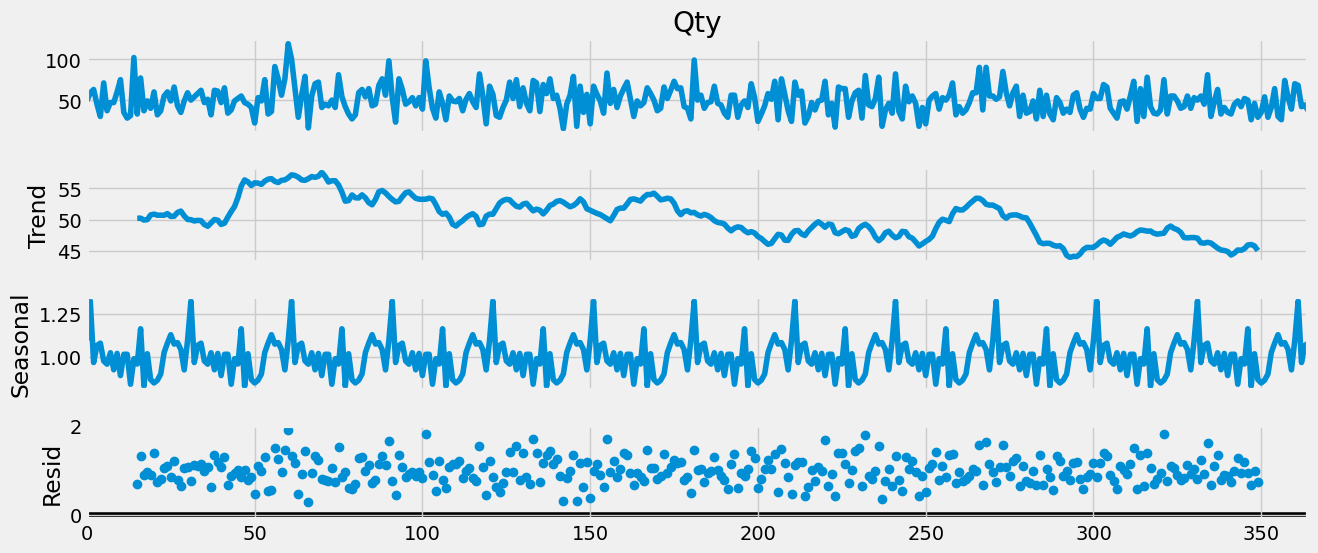

In [ ]:
result = seasonal_decompose(df['Qty'], model = 'multiplicative', period=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15,6)

d = 1 (seasonal) 0 (stationary)


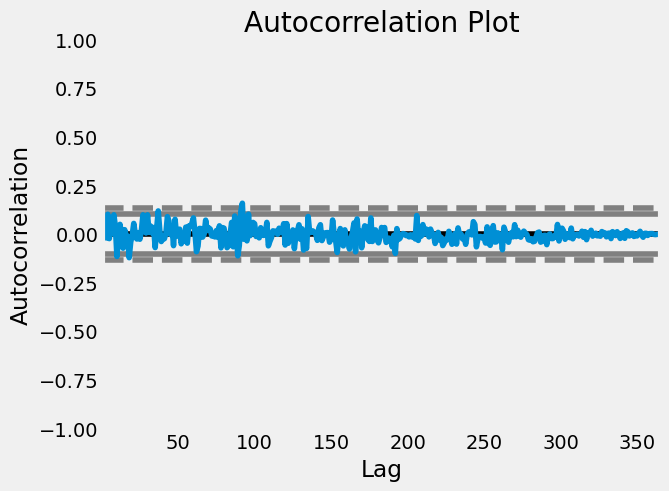

In [ ]:
pd.plotting.autocorrelation_plot(df['Qty'])
plt.title('Autocorrelation Plot')
plt.show()

In [ ]:
d = 1 #seasonal
p = 4 #garis dilewati

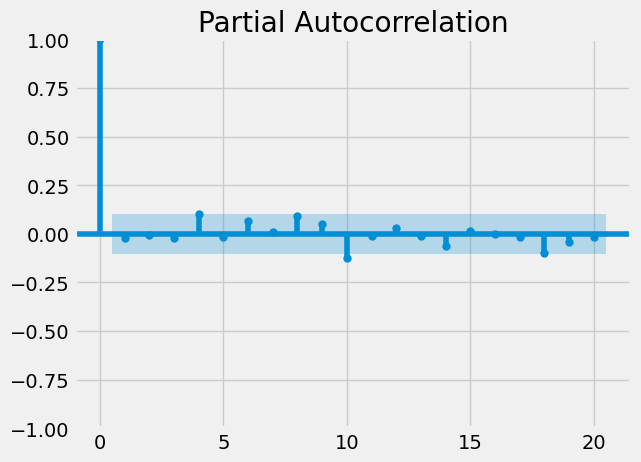

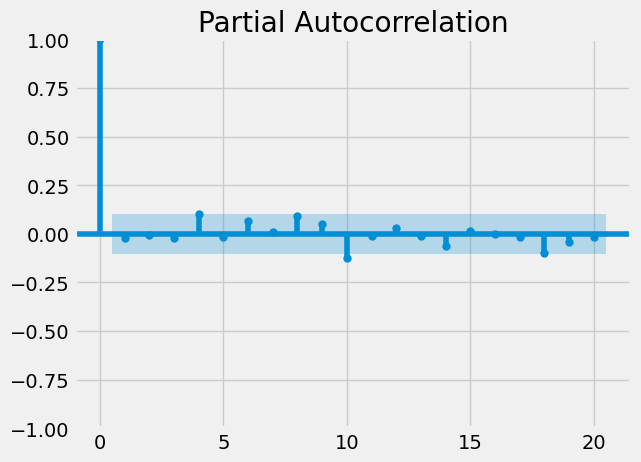

In [ ]:
plot_pacf(df['Qty'], lags=20)

In [ ]:
q = 1

In [ ]:
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

model = sm.tsa.statespace.SARIMAX(df['Qty'], 
                                  order=(p,d,q),
                                  seasonal_order=(p,d,q,12))
model = model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                Qty   No. Observations:                  365
Model:             SARIMAX(4, 1, 1)x(4, 1, 1, 12)   Log Likelihood               -1509.245
Date:                            Sun, 24 Sep 2023   AIC                           3040.490
Time:                                    20:29:45   BIC                           3082.990
Sample:                                         0   HQIC                          3057.403
                                            - 365                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0272      0.053     -0.511      0.609      -0.132       0.077
ar.L2          0.0118      0.056   

In [ ]:
# predict = model.predict(len(df), len(df)+24)
# print(predict)

# Prediksi 24 periode ke depan
forecast_period = 24
forecast = model.get_forecast(steps=forecast_period)

# Hasil prediksi
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Mencetak hasil prediksi
print("Prediksi:")
print(forecast_values)

Prediksi:
365    48.557948
366    45.915602
367    41.418337
368    43.584534
369    52.002057
370    43.804247
371    41.511104
372    49.887117
373    53.242902
374    43.448536
375    43.645201
376    49.020762
377    46.673503
378    46.320668
379    42.240996
380    46.007685
381    48.905970
382    45.819845
383    39.662045
384    48.350733
385    52.602010
386    42.826294
387    43.561103
388    47.921560
Name: predicted_mean, dtype: float64


<Axes: >

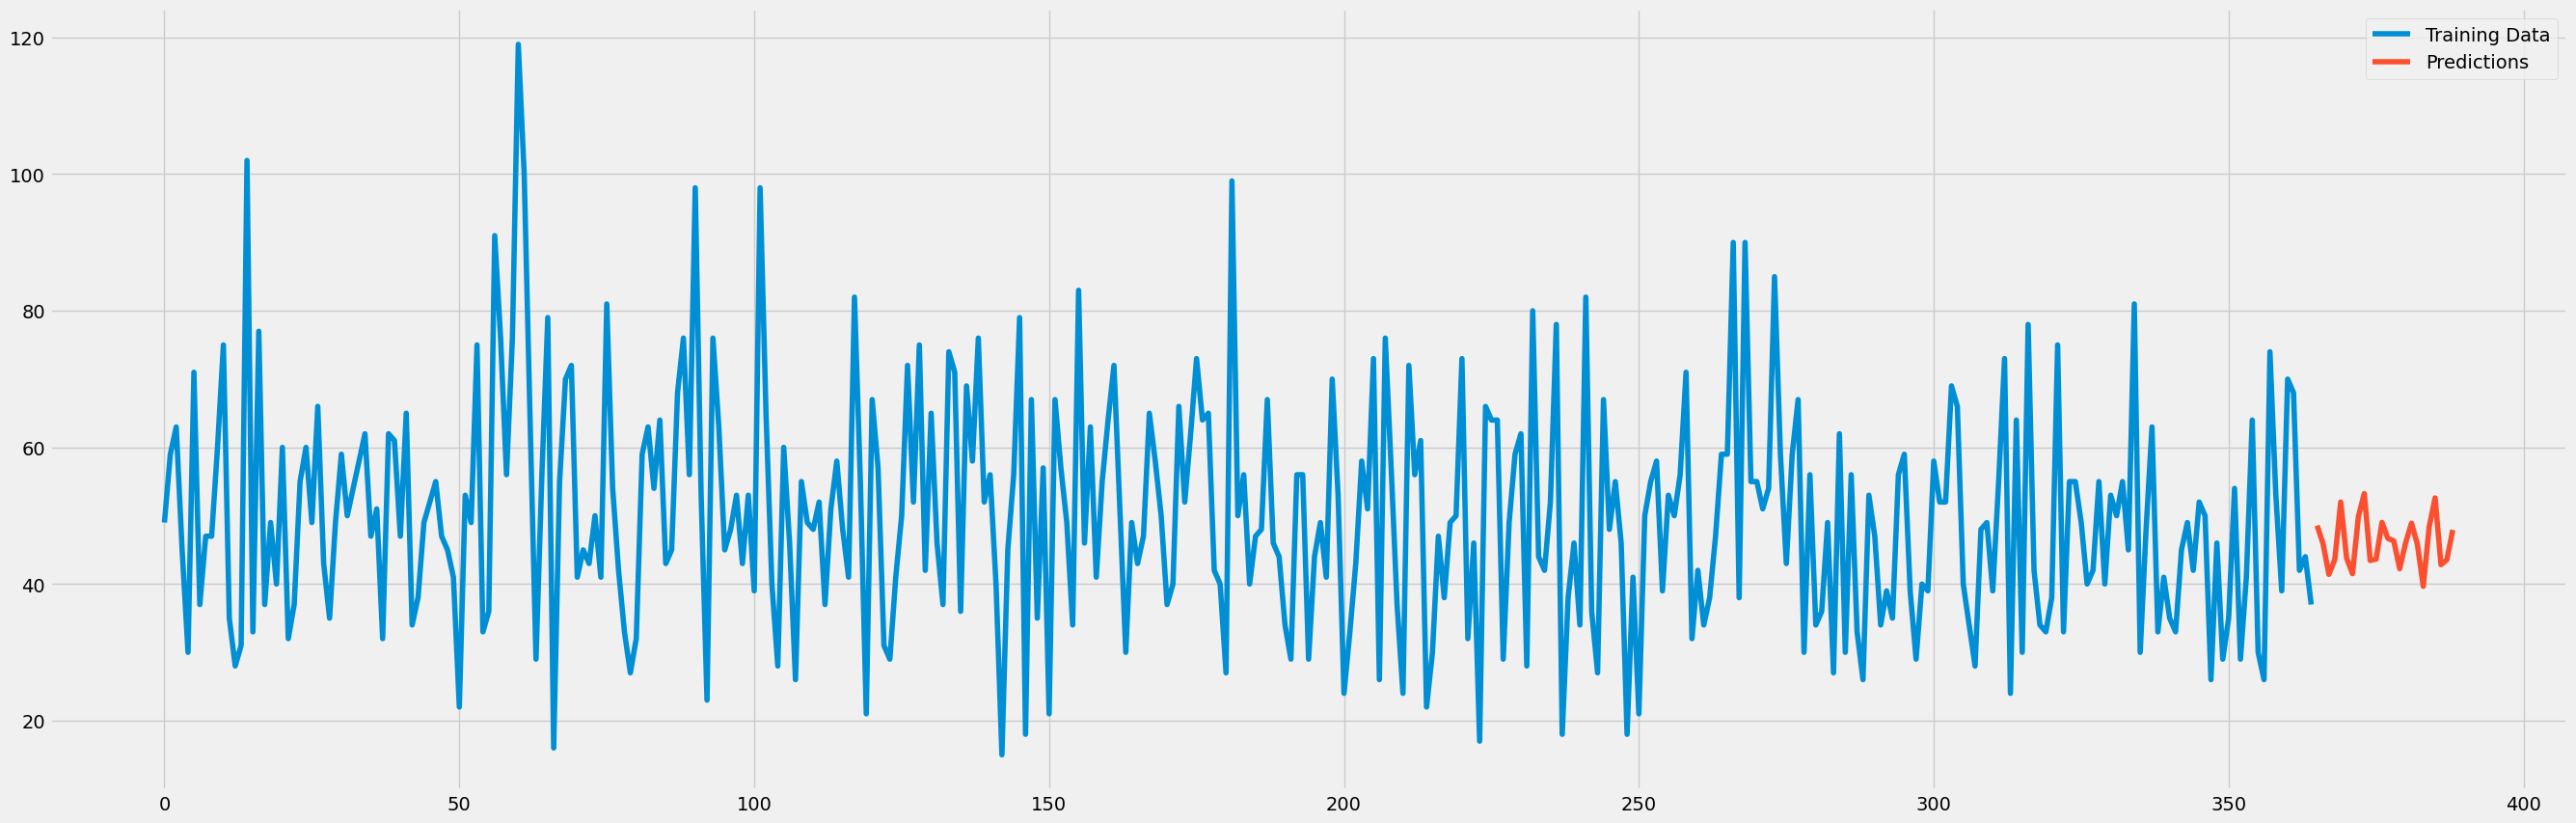

In [ ]:
df['Qty'].plot(legend=True,
               label='Training Data',
               figsize=(30,10))
forecast_values.plot(legend=True, label='Predictions')

In [ ]:
print("\nInterval Kepercayaan:")
print(confidence_intervals)


Interval Kepercayaan:
     lower Qty  upper Qty
365  15.706392  81.409504
366  13.059014  78.772190
367   8.555957  74.280716
368  10.709016  76.460053
369  19.031314  84.972799
370  10.834284  76.774210
371   8.540396  74.481812
372  16.925053  82.849181
373  20.279078  86.206726
374  10.484870  76.412201
375  10.681407  76.608995
376  16.057070  81.984454
377  13.614558  79.732449
378  13.262195  79.379142
379   9.182285  75.299707
380  12.949036  79.066333
381  15.845950  81.965989
382  12.759799  78.879891
383   6.602210  72.721880
384  15.298668  81.402798
385  19.549846  85.654173
386   9.774137  75.878450
387  10.508942  76.613264
388  14.869363  80.973758


In [ ]:
forecast_values.mean()

46.12211488182377

# **=======================================================================**

# **Clustering**

In [480]:
series_data.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Price_y,Bulan
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500,2022-01
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500,2022-07
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500,2022-09
3,TR4331,335,2022-01-08,P3,7500,3,22500,12,29,1,Single,4.74,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500,2022-01
4,TR6445,181,2022-01-10,P3,7500,4,30000,12,33,1,Married,9.94,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500,2022-01


In [481]:
df = series_data.groupby('CustomerID').agg({'TransactionID':'count',
                                                'Qty': 'sum',
                                                'TotalAmount': 'sum'})

In [482]:
df

,TransactionID,Qty,TotalAmount
CustomerID,,,
1,17,60,623300
2,13,57,392300
3,15,56,446200
4,10,46,302500
5,7,27,268600
...,...,...,...
443,16,59,485100
444,18,62,577700
445,18,68,587200


In [483]:
# Buat scatter plot
fig = px.scatter(df, x='Qty', y='TotalAmount', #color='cluster', 
                 title='Customer Distribution')

# Menghilangkan gridlines pada sumbu x dan y
# fig.update_xaxes(showgrid=False)
# fig.update_yaxes(showgrid=False)

# Menghilangkan warna latar belakang
# fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')

fig.update_layout(template='plotly_dark')
fig.show()

In [484]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans

Scale data dengan MinMax

In [485]:
features = ['Qty', 'TotalAmount']
X = df[features]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

Menentukan jumlah kluster

In [486]:
def find_clusters(df, max_K):
  clusters_centers = []
  k_values = []
  for k in range(1, max_K):
    kmeans_model = KMeans(n_clusters = k)
    kmeans_model.fit(df)
    clusters_centers.append(kmeans_model.inertia_)
    k_values.append(k)
  return clusters_centers, k_values

def generate_elbow_plot(clusters_centers, k_values):
  figure = plt.subplots(figsize = (8, 4))
  plt.plot(k_values, clusters_centers, 'o-', color = 'blue')
  plt.xlabel('Number of Clusters (K)')
  plt.ylabel('Cluster Inertia')
  plt.title('Elbow Plot of KMeans')
  plt.show()

In [487]:
clusters_centers, k_values = find_clusters(X_scaled, 12)

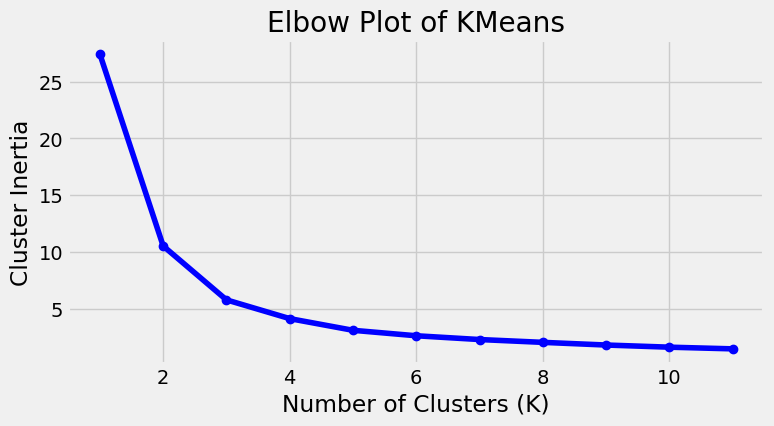

In [488]:
generate_elbow_plot(clusters_centers, k_values)

In [489]:
def plot_elbow_curve(data, max_k):
    cluster_inertias = []
    k_values = range(1, max_k)
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        cluster_inertias.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, cluster_inertias, 'o-', color='blue')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Cluster Inertia')
    plt.title('Elbow Plot of KMeans')
    plt.show()

Hasil kluster customer

In [490]:
# jumlah kluster
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# # Mendapatkan koordinat centroid kluster
# cluster_centers = kmeans.cluster_centers_

# Buat scatter plot
fig = px.scatter(df, x='TotalAmount', y='Qty', color='cluster', 
                 title='Cluster Customer')

# Tentukan urutan kluster yang diinginkan
cluster_order = sorted(df['cluster'].unique())  # Urutkan kluster unik
fig.update_xaxes(categoryorder='array', categoryarray=cluster_order)
fig.update_yaxes(categoryorder='array', categoryarray=cluster_order)

fig.update_layout(template='plotly_dark')
fig.show()

Menghitung Silhouette Score

In [491]:
from sklearn.metrics import silhouette_score

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(X_scaled, df['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.4199790444893819


**Kualitas Clustering:**

Skor Silhouette adalah positif (0.4199), yang menunjukkan bahwa clustering yang telah dilakukan memiliki sejajar antara jarak rata-rata antara data dalam cluster (cohesion) dan jarak antara data di cluster yang berbeda (separation). Ini adalah indikasi positif bahwa data-data dalam cluster saling berdekatan dan terpisah dengan baik dari cluster lainnya.

In [492]:
df.head()

,TransactionID,Qty,TotalAmount,cluster
CustomerID,,,,
1,17,60,623300,1
2,13,57,392300,3
3,15,56,446200,3
4,10,46,302500,0
5,7,27,268600,2


Tingkatan customers:
- Classic
- Silver
- Gold
- Platinum.

In [493]:
df['cluster'] = df['cluster'].map({0: 'Silver', 1: 'Platinum', 2: 'Classic', 3: 'Gold'})

Jumlah customer berdasarkan cluster (Tingkatan)

In [494]:

# Menghitung jumlah CustomerID dalam setiap kluster
cluster_counts = df['cluster'].value_counts().reset_index()
cluster_counts.columns = ['cluster', 'Count']

# Mengurutkan data berdasarkan nama cluster
cluster_counts = cluster_counts.sort_values(by='cluster', ascending=False)

# Membuat pie chart dengan Plotly
fig = px.pie(cluster_counts, values='Count', names='cluster', title='PERCENTAGE OF CUSTOMERS FROM CLUSTERS')

# Menentukan ukuran canvas (lebar dan tinggi)
fig.update_layout(
    width=600,  # Lebar dalam piksel
    height=400  # Tinggi dalam piksel
)

fig.update_layout(template='plotly_dark')
fig.show()